
# Table of  Contents

1.[Introduction](#1.-Introduction)

2.[Importing the Python libraries needed](#2.-Importing-the-Python-libraries-needed)

3.[Importing the dataset into the Jupyter Notebook](#3.-Importing-the-dataset-into-the-Jupyter-Notebook)

4.[Data Cleansing](#4.-Data-Cleansing)
> 4.1[Dealing with data type and missing values](#4.1-Dealing-with-data-type-and-missing-values)  
> 4.2[ Dropping duplicates ](#4.2-Dropping-duplicates)  
> 4.3[ Obtaining statistical summary](#4.3-Obtaining-statistical-summary)

5.[Exploratory data analysis and visualization](#5.-Exploratory-data-analysis-and-visualization)  
> 5.1[Price](#5.1-Price)  
> 5.2[Location](#5.2-Location)  
> 5.3[Attributes of the house itself](#5.3-Attributes-of-the-house-itself)  
> 5.4[Attributes of the exterior of the house](#5.4-Attributes-of-the-exterior-of-the-house)  


6.[Model Development](#6.-Model-development)  
> 6.1 [Pearson Correlation Matrix](#6.1-Pearson-Correlation-Matrix)  
> 6.2 [OLS Regression 1](#6.2-OLS-Regression-1)  
> 6.3 [OLS Regression 2 (Adding Zipcode)](#6.3-OLS-Regression-2-(Adding-Zipcode))   
> 6.4 [OLS Regression 3 (Using log(price)](#6.4-OLS-Regression-3-(Using-log(price)))  
> 6.5 [Validate the prediction](#6.5-Validate-the-prediction)

7.[Insights](#7.-Insights)

# 1. Introduction

King county is the most populous county in Washington State.It also has the 13th-most populous in the United States. Seattle is the county seat , which is the state’s largest city. About 2/3 of king county's population lives in the city's suburbs. King County ranks among the 100 highest-income counties in the United States. The headquarters of some world famous companies are located here, such as Microsoft, Amazon, Costco, Starbucks,Expeditor,etc. This paper focus on exploratory analysis on the House Sales in King County dataset, addressing which attributes have impacts on the house price, and building a model to predict the house price.

# 2. Importing the Python libraries needed

In [1]:
!pip install folium
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)
import folium                                                    
import folium.plugins as plugins  
from folium.plugins import MarkerCluster


# 3. Importing the dataset into the Jupyter Notebook

In [2]:
kc_raw= pd.read_csv("kc_house_data.csv")
kc_raw

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


There are 21,613 observations and 21 variables in our dataset. let's have a closer look at what do the variables represent.

| Variable      | Description                                                                                              |
| ------------- | ---------------------------------------------------------------------------------------------------------|
| id            | Unique id for each house sold                                                                            |
| date          | Date house was sold                                                                                      |
| price         | Price the house sold                                                                                     |
| bedrooms      | Number of bedrooms                                                                                       |
| bathrooms     | Number of bathrooms                                                                                      |
| sqft_living   | Area of the home                                                                                         |
| sqft_lot      | Area of the land space                                                                                   |
| floors        | Number of floors (levels)                                                                                |
| waterfront    | A dummy varialbe for whether the house has a view to a waterfront or not                                 |
| view          | An index from 1 to 4 of how good the view of the property is                                             |
| condition     | An index from 1 to 5 on the condition of the house                                                       |
| grad | An index from 1 to 13 on how good the construction and desig of the house is based on King County grading system  |
| sqft_above    | Area of the house that is above groud level                                                              |
| sqft_basement | Area of the basement                                                                                     |
| yr_built      | Year the house was built                                                                                 |
| yr_renovated  | Year when the house was last renovated                                                                   |
| zipcode       | Zip code                                                                                                 |
| lat           | Latitude coordinate                                                                                      |
| long          | Longitude coordinate                                                                                     |
| sqft_living15 | The average house area of the 15 closet houses                                                           |
| sqft_lot15    | The average lot area of the 15 closet houses                                                             |

# 4. Data Cleansing

Before we do any exploratory analysis on the dataset, let's first get the dataset ready by cleansing it.

## 4.1 Dealing with data type and missing values 
Let's check what type of variables they are and whether there is any missing values. Deal with the missing value and convert the variable inot right data type.

In [3]:
kc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Using the  method .infor we find that the dataset doesn't have any missing values and almost all of the variables except date which is object are numeric. But in general, column date should be datetime type, and column id and zipcode shoulde be string type, so let's convert them into the right type.

In [4]:
kc_raw[["id","zipcode"]]=kc_raw[["id","zipcode"]].astype(str)
kc_raw["date"] = pd.to_datetime(kc_raw["date"])
kc_raw.info()
kc_raw.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  object        
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## 4.2 Dropping duplicates 

Using method duplicated. we find there is no duplicte in the dataset.

In [5]:
duplicate = kc_raw[kc_raw.duplicated()]
duplicate

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


## 4.3 Obtaining statistical summary

Using method .describe we get a general statistical understanding on the dataset.

In [6]:
kc_raw.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


When we check the statistic summary, we found some variable seems no reasonable. For example, the minmum number for bedroom and bathroom is 0, and the maximum number for bedroom is 33. So let's have a look at these records.

In [7]:
kc_raw_unreasonable=kc_raw[(kc_raw["bedrooms"]==33)| (kc_raw["bedrooms"]==0 )| (kc_raw["bathrooms"]==0)]
kc_raw_unreasonable

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,6306400140,2014-06-12,1095000.0,0,0.00,3064,4764,3.5,0,2,...,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
1149,3421079032,2015-02-17,75000.0,1,0.00,670,43377,1.0,0,0,...,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882
3119,3918400017,2015-02-05,380000.0,0,0.00,1470,979,3.0,0,2,...,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
3467,1453602309,2014-08-05,288000.0,0,1.50,1430,1650,3.0,0,0,...,7,1430,0,1999,0,98125,47.7222,-122.290,1430,1650
4868,6896300380,2014-10-02,228000.0,0,1.00,390,5900,1.0,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000
5832,5702500050,2014-11-04,280000.0,1,0.00,600,24501,1.0,0,0,...,3,600,0,1950,0,98045,47.5316,-121.749,990,22549
6994,2954400190,2014-06-24,1295650.0,0,0.00,4810,28008,2.0,0,0,...,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
8477,2569500210,2014-11-17,339950.0,0,2.50,2290,8319,2.0,0,0,...,8,2290,0,1985,0,98042,47.3473,-122.151,2500,8751
8484,2310060040,2014-09-25,240000.0,0,2.50,1810,5669,2.0,0,0,...,7,1810,0,2003,0,98038,47.3493,-122.053,1810,5685
9773,3374500520,2015-04-29,355000.0,0,0.00,2460,8049,2.0,0,0,...,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050


In orde to make the analysis more accurate, we should drop these unreasonable rows

In [8]:
kc= kc_raw[(kc_raw["bedrooms"]!=33) & (kc_raw["bedrooms"]!=0) & (kc_raw["bathrooms"]!=0)]
kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Now we have the cleaned dataser kc_cleaned which have 21596 rows and 21 columns

# 5. Exploratory data analysis and visualization

## 5.1 Price
Our object is to predict the house price, so first let's get a general understanding on price by the overall distribution and check is there any trend on sold date.

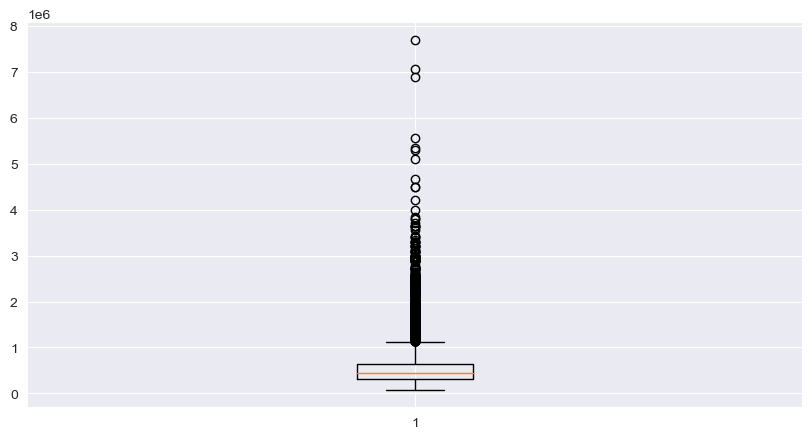

In [9]:
plt.figure(figsize=(10,5))
plt.boxplot(kc["price"])
plt.show()

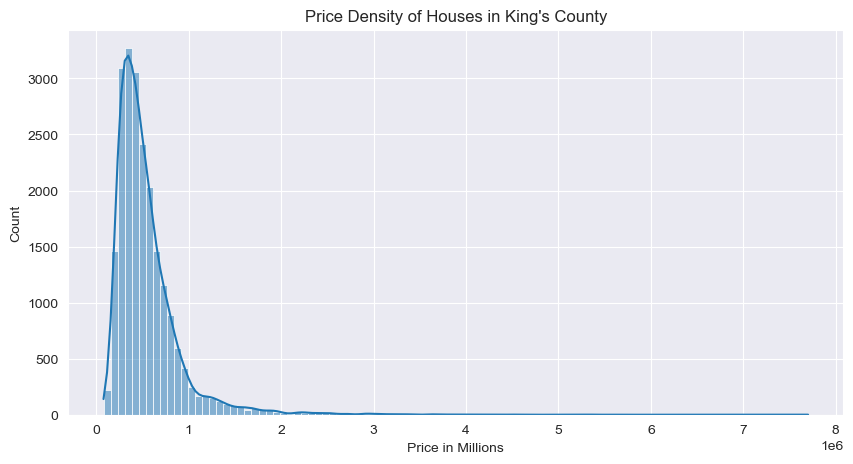

In [10]:
plt.figure(figsize=(10,5))
price_hist = sns.histplot(kc["price"],kde=True,bins=100)
price_hist.set(xlabel="Price in Millions", title="Price Density of Houses in King's County")
plt.show()

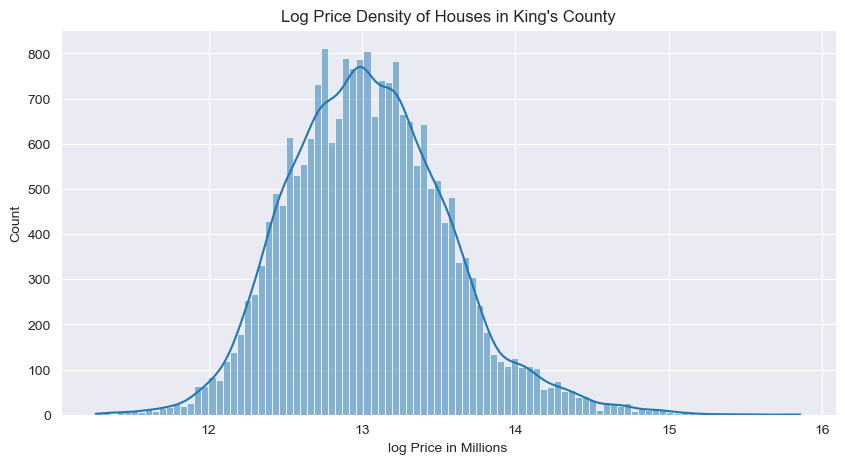

In [11]:
plt.figure(figsize=(10,5))
price_hist = sns.histplot(np.log(kc["price"]),kde=True,bins=100)
price_hist.set(xlabel="log Price in Millions", title="Log Price Density of Houses in King's County")
plt.show()

C:\Users\Administrator\AppData\Local\Temp\2\ipykernel_11588\2168064592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kc["month_sold"]=kc["date"].dt.month


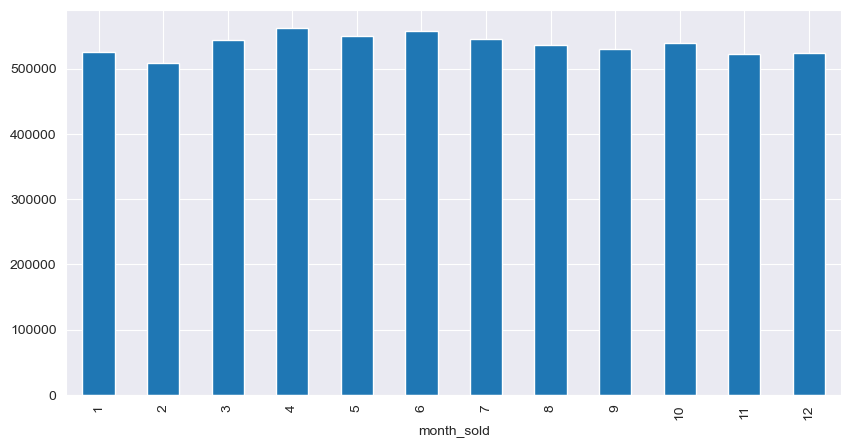

In [12]:
kc["month_sold"]=kc["date"].dt.month
price_by_month_sold=kc["price"].groupby(kc["month_sold"]).mean()
plt.figure(figsize=(10,5))
price_by_month_sold.plot(kind="bar")
plt.show()

From the boxplot and the distribution chart of house price we found that the price has a large range, and the dataset is obviously right skew. When we use log value of the house price, we got a normal bell curve distribution. So it maybe a better choice to use logged value to do regression. There are many outliers in price, but I will still keep these data because in real life there are indeed some luxurious house whith very high price. From the  bar chart of average price by motnh, we see that the average price of the sold houses don't have  any obious pattern.

## 5.2 Location
When we talk about a house, the first thing we will think about is where the house is located, so let's explore the impact of the location on the house price. 

In [13]:
kc["zipcode"].nunique()

70

<AxesSubplot:xlabel='zipcode'>

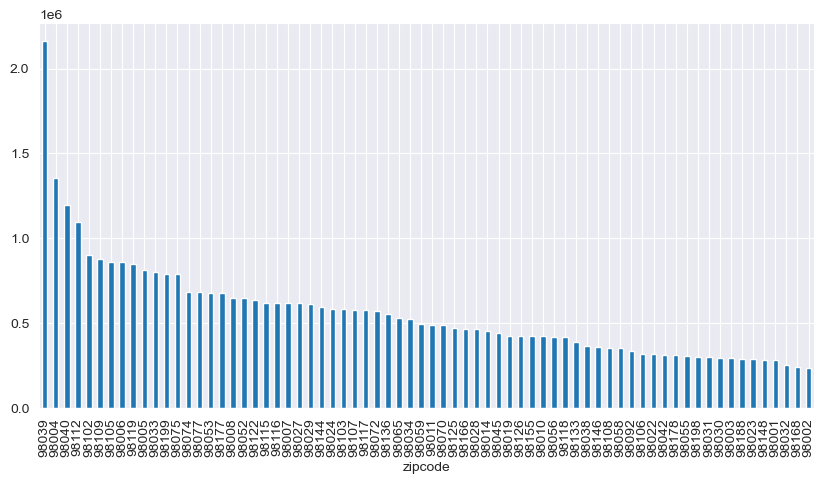

In [14]:
plt.figure(figsize=(10,5))
price_by_zipcode= kc["price"].groupby(kc["zipcode"]).mean()
price_by_zipcode.sort_values(ascending=False).plot(kind="bar")

From the coloumn chart we can see the house price in some area is higher than other areas. This is reasonable because the area that is fairly urban and popular should have a higher price. Location does matter.

In [15]:
def marker_color(price):
    if price < 100000:      # Lower Price
        return "green"
    elif price < 300000:    # Lower-med Price
        return "blue"
    elif price < 600000:    # Med Price
        return "purple"
    elif price < 1000000:   # Med_higher Price
        return "orange"
    else:                   # Higher price 
        return "red"
kc["marker_color"]= kc["price"].apply(marker_color)
kc["marker_color"]

C:\Users\Administrator\AppData\Local\Temp\2\ipykernel_11588\1259032045.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kc["marker_color"]= kc["price"].apply(marker_color)


0          blue
1        purple
2          blue
3        orange
4        purple
          ...  
21608    purple
21609    purple
21610    purple
21611    purple
21612    purple
Name: marker_color, Length: 21596, dtype: object

In [16]:
coordinate=[kc["lat"].mean(),kc["long"].mean()]
coordinate

[47.56008708094088, -122.21397707908808]

In [17]:
sample=kc.sample(n=2000)

In [18]:
map = folium.Map(location = coordinate,zoom_start=10)

In [19]:
for index,row in sample.iterrows():
    folium.CircleMarker(location=(row["lat"],row["long"]),
                        radius=2,
                        color=row["marker_color"]
                                   ).add_to(map)
        
map

From the coloumn chart for average price of each zipcode,we can see the house price in some area is higher than other areas.
From the map We can see that many of the house with higer price are located around Seattle and Bellevue. This is reasonable because this area is fairly urban and popular cities. As we move south, further away from the two cities, the prices of the house become lower.

After the location, let's explore the impact of the atrributes of the house itself. There are two kind of variables about the house: attributes of the house itself and attributes of the exterior of the house.First let's explore the attributes about the house itself.

## 5.3 Attributes of the house itself
### 5.3.1 Subjective rate
First as a whole, there are two varialbes that rate the house. Condition ranks from 1 to 5 for the conditions of the house. Grade is an index from 1 to 13 on how good the construction and desig of the house which is based on King County grading system.It is a classification by construction quality which refers to the types of materials used and the quality of workmanship. Houses of higher grade cost more to build and command higher value. Let's have a look at the impact of these 2 variables

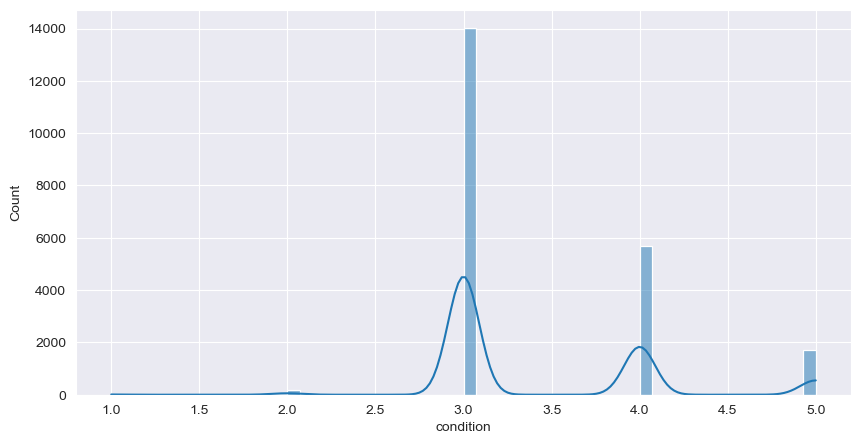

In [20]:
plt.figure(figsize=(10,5))
cond_hist =sns.histplot(kc["condition"],kde=True)
plt.show()

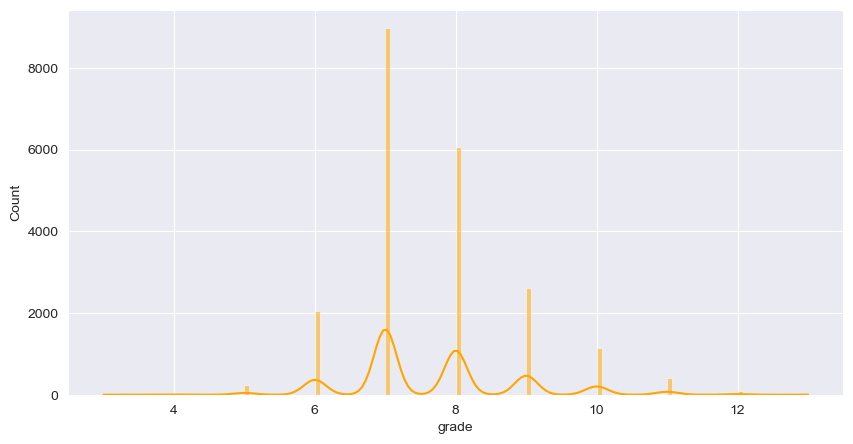

In [21]:
plt.figure(figsize=(10,5))
grade_hist = sns.histplot(kc["grade"],kde=True,color="orange")
plt.show()

<AxesSubplot:xlabel='condition', ylabel='price'>

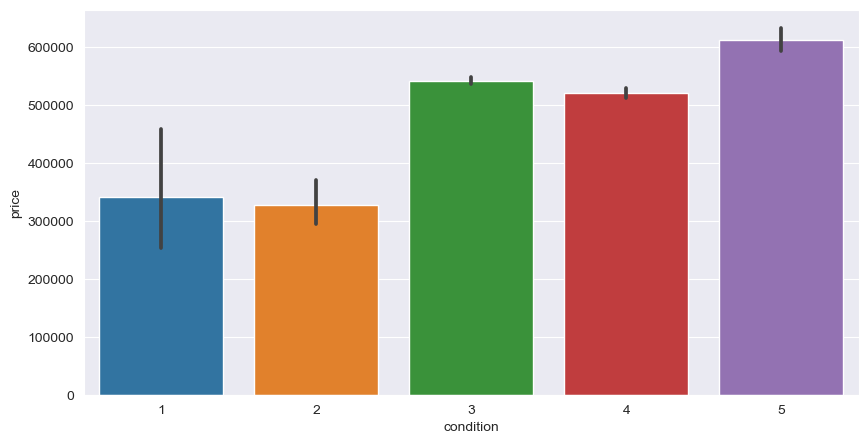

In [22]:
plt.figure(figsize=(10,5))
sns.barplot(x=kc["condition"],y=kc["price"],data=kc)

<AxesSubplot:xlabel='grade', ylabel='price'>

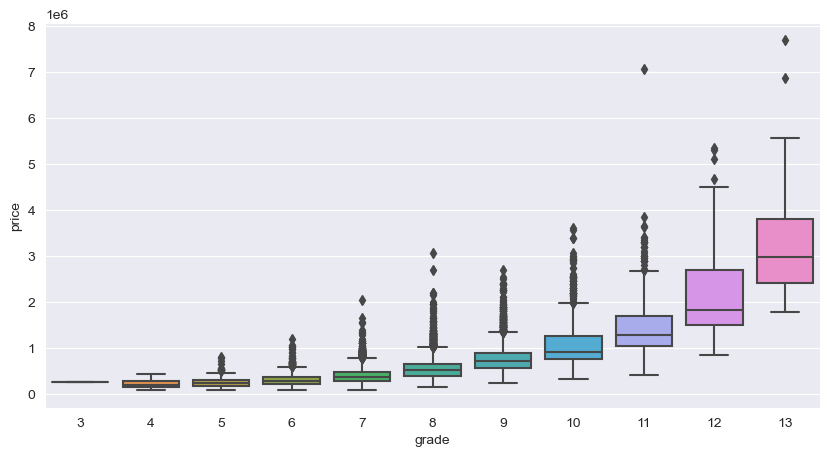

In [23]:
plt.figure(figsize=(10,5))
sns.boxplot(x=kc["grade"],y=kc["price"],data=kc)

From the above chart,It is reasonable that most of the house sold is in condition 3 and house in condition 1 and 2 are less likely to sold because of the poor conditions. But house in conditon 4 has a lower average price than house in conditon 3, so there isn't a strict relation between price. For grade, most of the house sold are in the middle of the scale, and it is very easy to see that the house with high grade has a high prcie in average.

### 5.3.2 Objective attributes

#### A. Numbers of bedroom and bathroom
First check the distribution of the mumbers of bedroom and bathroom.

<Figure size 1000x500 with 0 Axes>

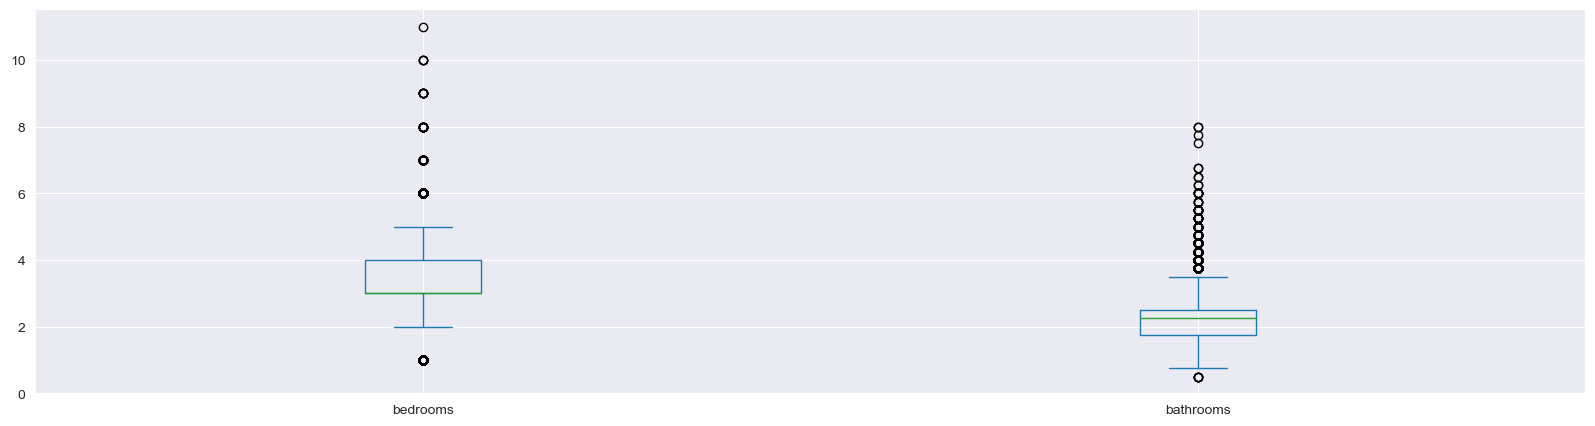

In [24]:
plt.figure(figsize=(10,5))
kc[["bedrooms","bathrooms"]].plot(kind="box")
plt.show()

From the above boxplot for bedrooms and bathrooms, it looks there are many outliers. But we know it is normal because there are some big luxuriou house with many bedrooms and bathrooms. So we will still keep this records. 

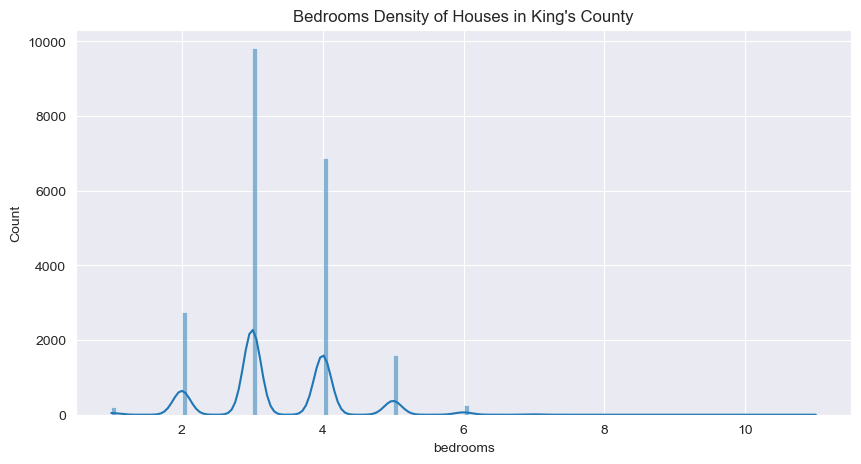

In [25]:
plt.figure(figsize=(10,5))
bedrooms_hist = sns.histplot(kc["bedrooms"],kde=True)
bedrooms_hist.set(xlabel="bedrooms", title="Bedrooms Density of Houses in King's County")
plt.show()

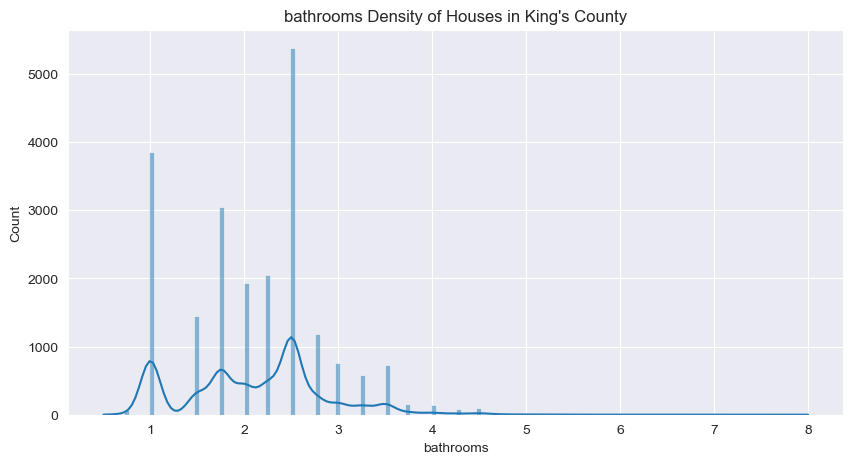

In [26]:
plt.figure(figsize=(10,5))
bathrooms_hist = sns.histplot(kc["bathrooms"],kde=True)
bathrooms_hist.set(xlabel="bathrooms", title="bathrooms Density of Houses in King's County")
plt.show()

From the above histgram we could see most of the sold house have 3 bedrooms followed by 4 bedrooms. there are
rarely one and 5+ bedrooms houses sold. We also noticed that there are some decimal such as 2.25,2.5,1.75 in bathrooms. This is because a full bathroom has all four parts: a toilet, a sink, a bathtub, and a shower. 0.75 represnets a bathroom that has just three of those parts (usually a toilet, sink, and shower). 0.5 represents a bathroom that has just a toilet and sink. Most of the sold house have 2.5 bathrooms and rarely  have 4+ bathrooms.
We already have a sense about the bedrooms and bathrooms, next let's find what is the impact of these 2 attributes on the house price.

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

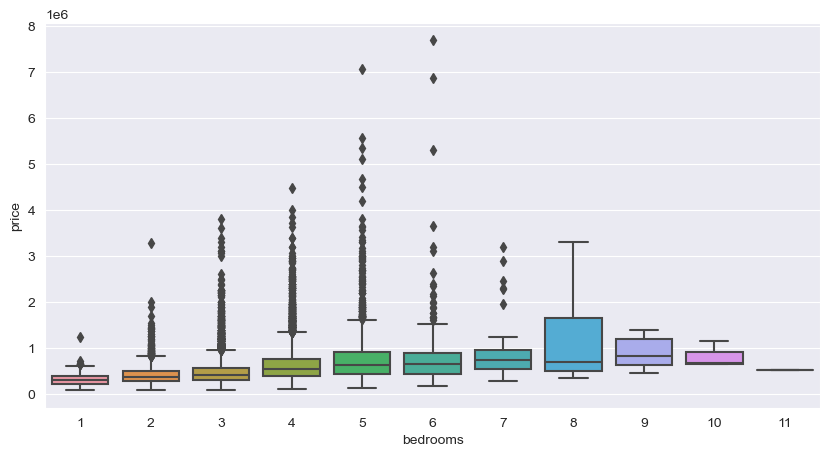

In [27]:
plt.figure(figsize=(10,5))
sns.boxplot(x=kc["bedrooms"],y=kc["price"],data=kc)

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

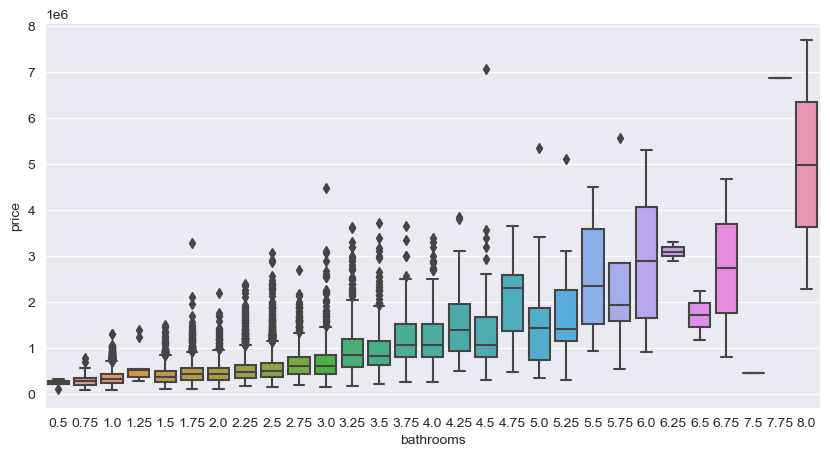

In [28]:
plt.figure(figsize=(10,5))
sns.boxplot(x=kc["bathrooms"],y=kc["price"],data=kc)

The above first bar charts tell us that the more bedrooms the higer price when there are less than 9 bedrooms, and vice 
verse. We also can see that generally the house with more bathrooms have higer price. 

#### B. Size of the house
There are 4 variables about the size of the house: sqft_lot,sqft_living,sqft_above and sqft_basement. And we know that sqft_living is the sum of sqft_above and sqft_basement.
##### B-1 : sqft_lot

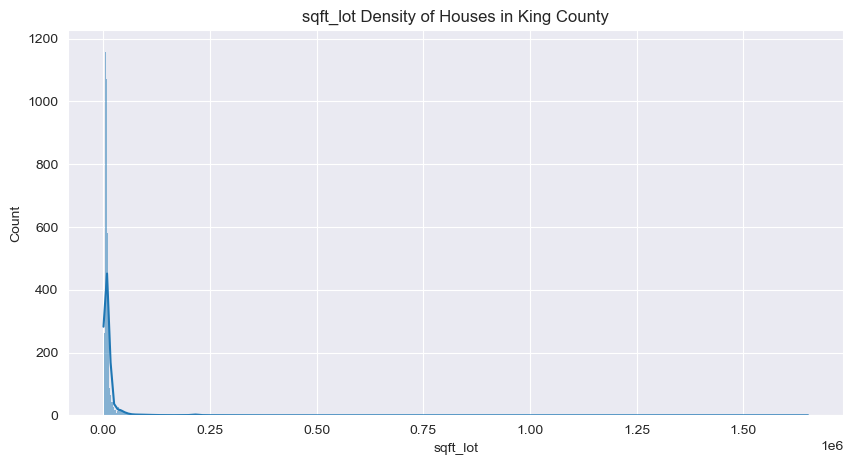

In [29]:
plt.figure(figsize=(10,5))
sqft_lot_hist=sns.histplot(kc["sqft_lot"],kde=True)
sqft_lot_hist.set(xlabel="sqft_lot",title="sqft_lot Density of Houses in King County")
plt.show()

<AxesSubplot:xlabel='sqft_lot', ylabel='price'>

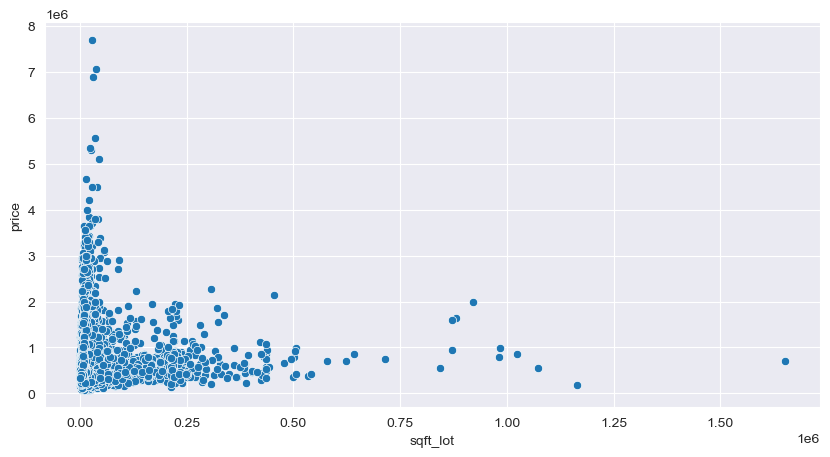

In [30]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=kc,x=kc["sqft_lot"],y=kc["price"])

From the above chart, we konw there is no obvious pattern in the distribution of sqft_lot. Some house have small lot and some have very big lote. And the size of the lot don't have obvious relation with the price.
##### B-2: sqft_living, sqft_above, sqft_basement

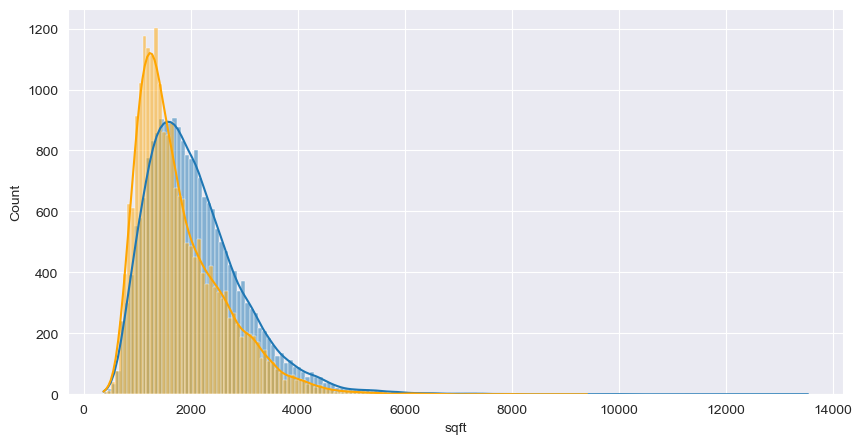

In [31]:
plt.figure(figsize=(10,5))
sqft_living_hist=sns.histplot(kc["sqft_living"],kde=True)
sqft_above_hist=sns.histplot(kc["sqft_above"],kde=True,color="orange")
sqft_living_hist.set(xlabel="sqft")
plt.show()


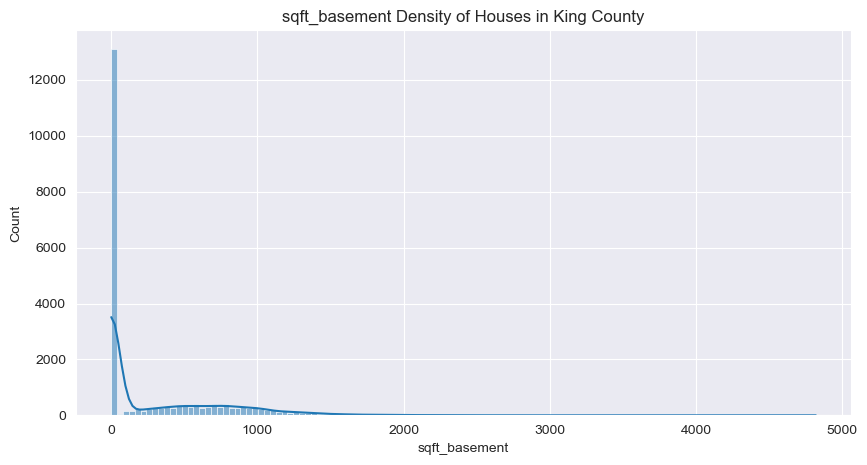

In [32]:
plt.figure(figsize=(10,5))
sqft_basement_hist=sns.histplot(kc["sqft_basement"],kde=True)
sqft_basement_hist.set(xlabel="sqft_basement",title="sqft_basement Density of Houses in King County")
plt.show()

In [33]:
count_no_basement= len(kc[kc["sqft_basement"]==0])
count_all=len(kc)
perc=count_no_basement/len(kc)
print("count_no_basement=",count_no_basement,"  ","count_all=",count_all,"  ","perc=",perc)

count_no_basement= 13110    count_all= 21596    perc= 0.6070568623819226


[Text(0.5, 0, 'sqft')]

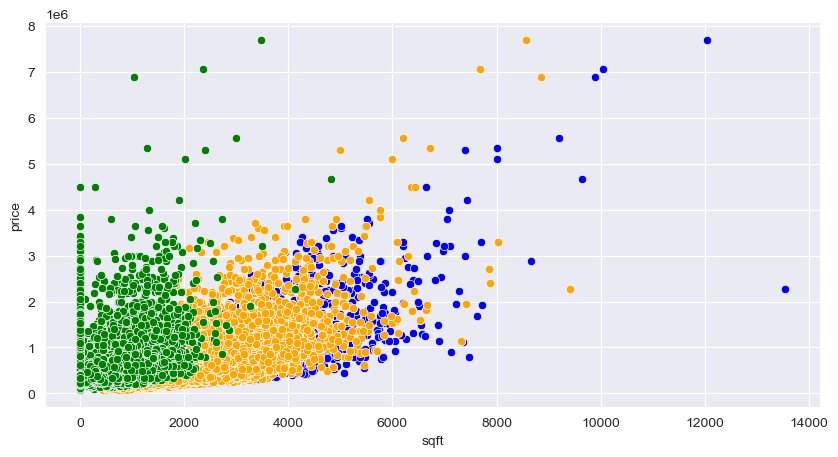

In [34]:
plt.figure(figsize=(10,5))
sqft_living_scatter=sns.scatterplot(data=kc,x=kc["sqft_living"],y=kc["price"],color="blue")
sqft_above_scatter=sns.scatterplot(data=kc,x=kc["sqft_above"],y=kc["price"],color="orange")
sqft_basement_scatter=sns.scatterplot(data=kc,x=kc["sqft_basement"],y=kc["price"],color="green")
sqft_living_scatter.set(xlabel="sqft")

Based the above analysis we found more than 60% house don't have basement, and both sqft_living and sqft_above have normal bell_shaped ditribution and the little difference between them is due to that some houses do have basement.
We know sqft_living and sqft_above are highly related and from the scatter plot we see they have almost the same relation with price, so we should only choose one as an independent variable when we build regression model. At the same time although many house don't have basement it seems basement still have a posite impact on price.

#### C. Floors of the house
First check the distribution of the house levle

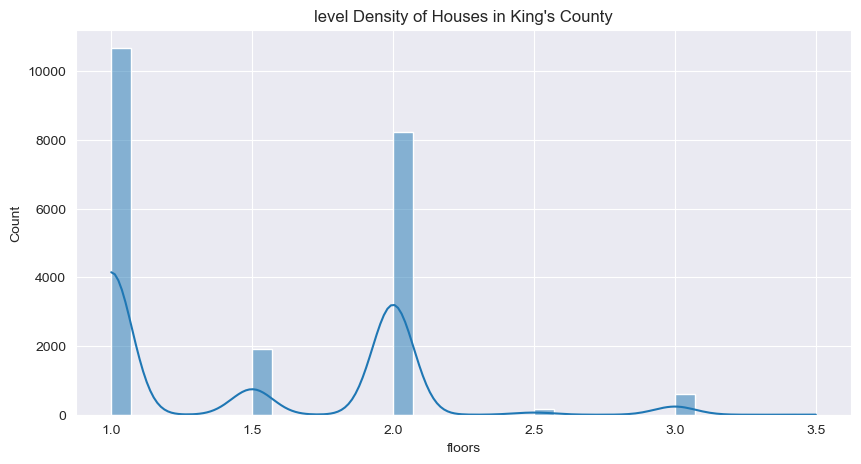

In [35]:
plt.figure(figsize=(10,5))
grade_hist = sns.histplot(kc["floors"],kde=True)
grade_hist.set(xlabel="floors", title="level Density of Houses in King's County")
plt.show()

<AxesSubplot:xlabel='floors', ylabel='price'>

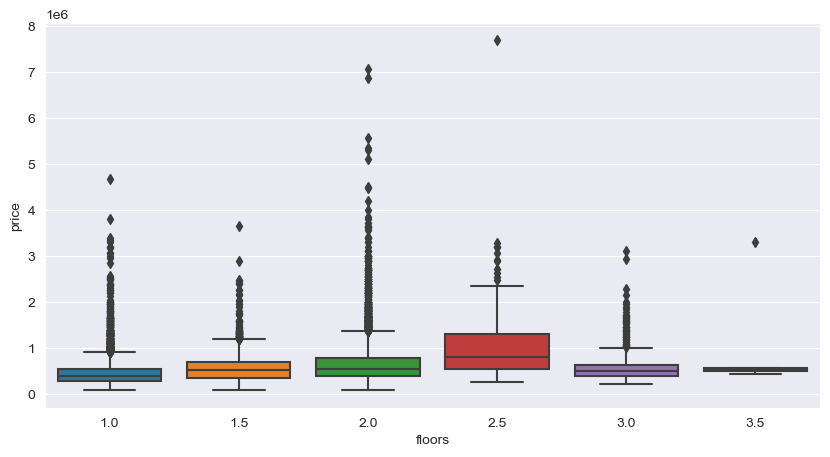

In [36]:
plt.figure(figsize=(10,5))
sns.boxplot(x=kc["floors"],y=kc["price"],data=kc)

It seems that the house with one floor is most popular followed by the house with two floors, and he houses with 2.5 floors have a higher average price than others. 

####  Years
In the dataset, there are 2 variables about the time of the house : year_built and year_renovated. Each house has its sold date and built year,but not necessarily has its renovated year. Let's check how many houses have been renovated.

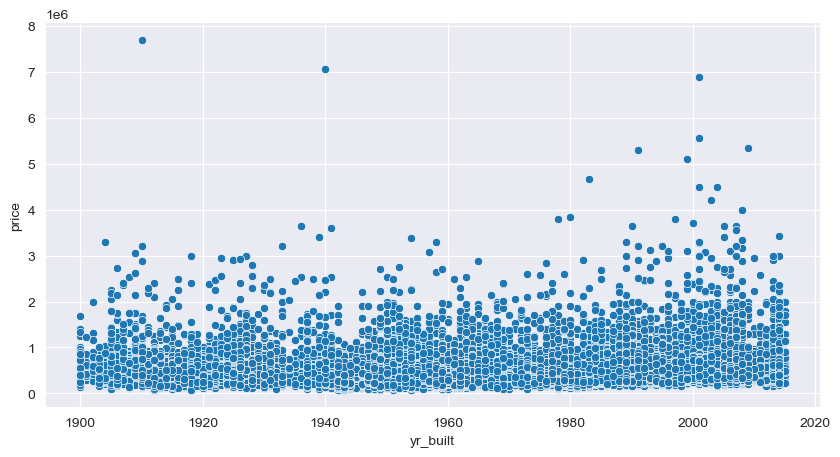

In [37]:
plt.figure(figsize=(10,5))
ax=sns.scatterplot(data=kc,x=kc["yr_built"],y=kc["price"])
plt.show()

<Figure size 1000x500 with 0 Axes>

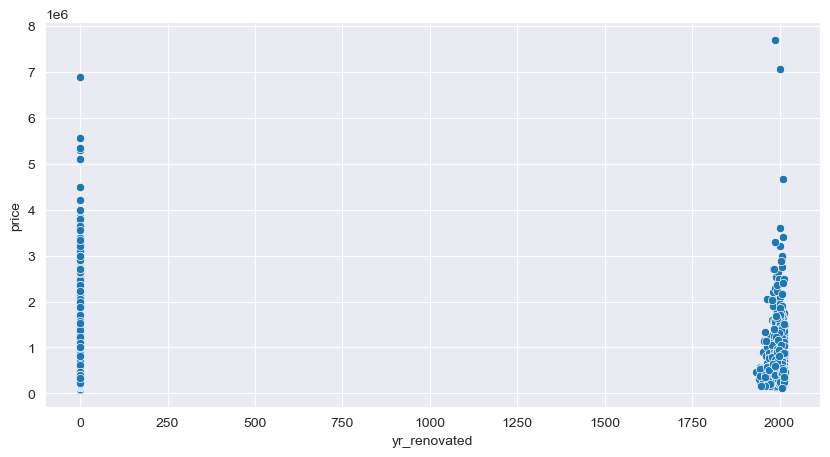

<Figure size 1000x500 with 0 Axes>

In [38]:
plt.figure(figsize=(10,5))
ax=sns.scatterplot(data=kc,x=kc["yr_renovated"],y=kc["price"])
plt.figure(figsize=(10,5))

We found that almost all of the house don't get renovated. The house price amost has no relation with yr_built and yr_renovated.

## 5.4 Attributes of the exterior of the house

There are 4 variables for attributes of the exterior of the house: view, waterfall, sqft_liv15, sqft_lot15. Let's explore one by one.
### 5.4.1 View
View is an index from 1 to 4 of how good the view of the property is. How about the distribution of view? And what is the impact of the view on the house price?

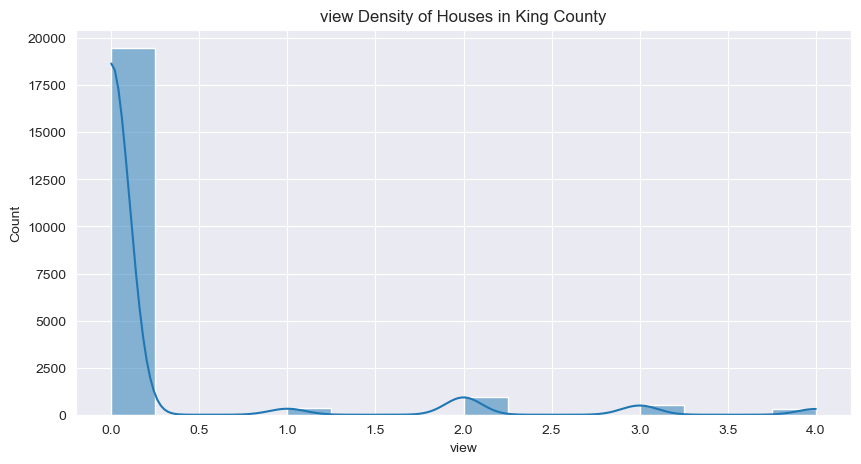

In [39]:
plt.figure(figsize=(10,5))
view_hist = sns.histplot(kc["view"],kde=True)
view_hist.set(xlabel="view", title="view Density of Houses in King County")
plt.show()

<AxesSubplot:xlabel='view'>

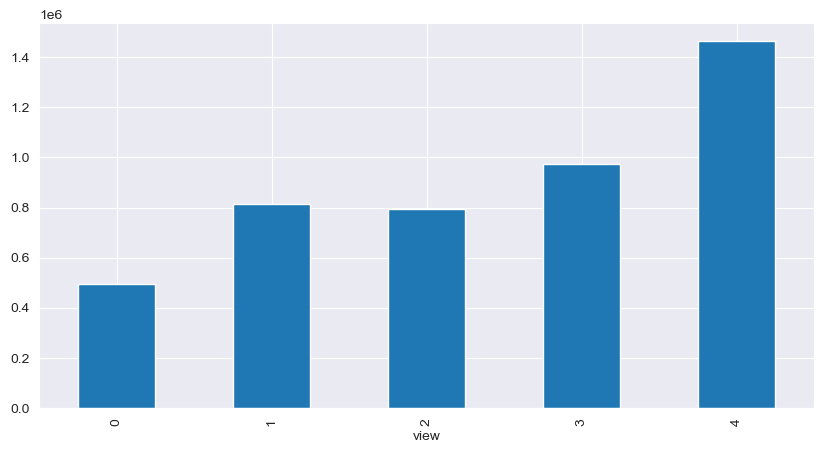

In [40]:
plt.figure(figsize=(10,5))
price_by_view= kc["price"].groupby(kc["view"]).mean()
price_by_view.plot(kind="bar")

We can see most of the house is sacled in 0 for view. The houses with higher graded view have a higher average price.

### 5.4.2. Waterfront
Waterfront is a dummy varialbe for whether the house has a view to a waterfront or notHow many houses have waterfall? Is the average price of the houses with waterfsll higher than that of the house without waterfall?

waterfront
0    21433
1      163
dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


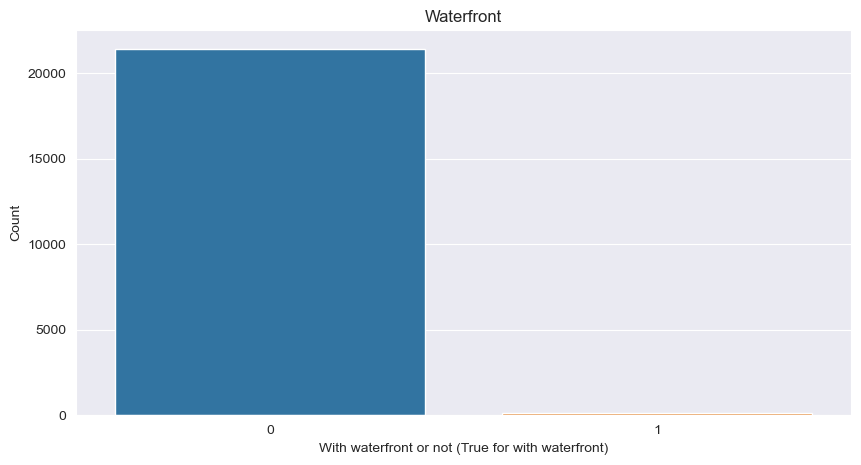

In [41]:
plt.figure(figsize=(10,5))
waterfront_group = kc.groupby(by=["waterfront"])
waterfront_freq = waterfront_group.size()
print(waterfront_freq)
waterfront_freq_plot = sns.barplot(waterfront_freq.index, waterfront_freq.values)
waterfront_freq_plot.set(xlabel="With waterfront or not (True for with waterfront)", ylabel="Count", title="Waterfront")
plt.show()

<AxesSubplot:xlabel='waterfront'>

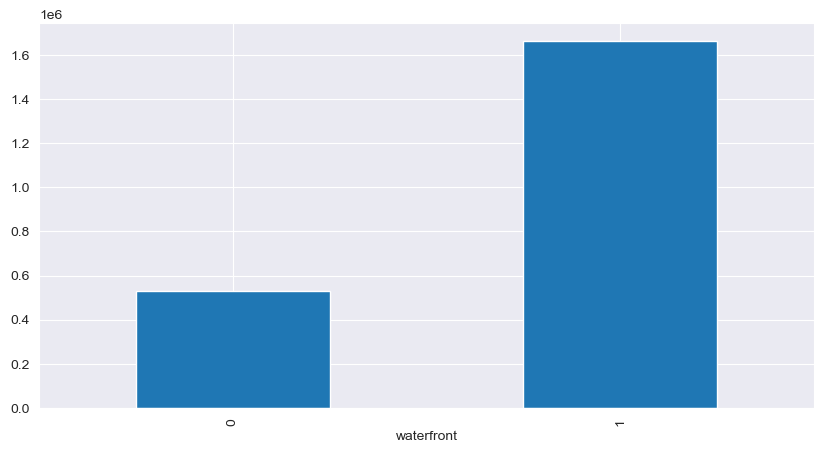

In [42]:
plt.figure(figsize=(10,5))
price_by_waterfront = kc["price"].groupby(kc["waterfront"]).mean()
price_by_waterfront.plot(kind="bar")

Almost all of the house don't have a view to waterfront. The average price of the houses with water front is higher than that of the house without waterfront.

### 5.4.3 Sqft_living15 and sqft_lot15
Sqft_living15 represents the average house area of the 15 closet houses, and sqfr_lot15 represents the average lot area of the 15 closet houses.

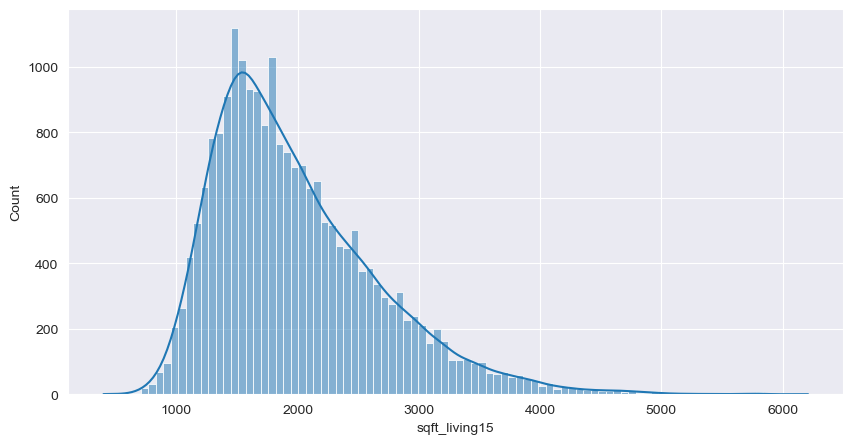

In [43]:
plt.figure(figsize=(10,5))
sqft_living15_hist=sns.histplot(kc["sqft_living15"],kde=True)
plt.show()

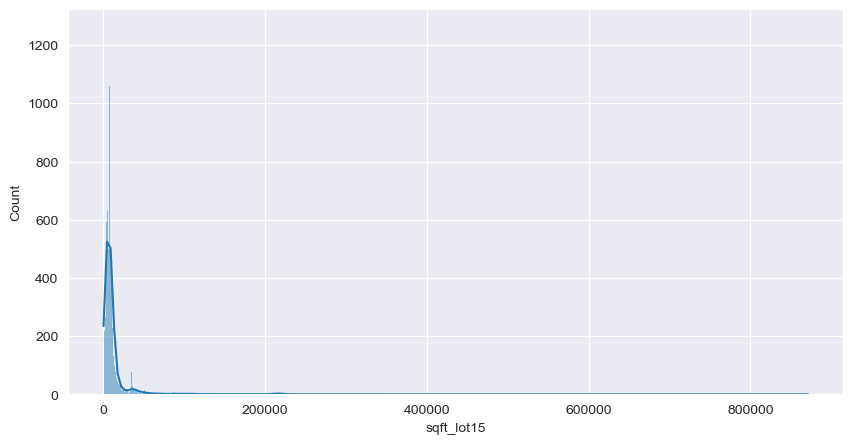

In [44]:
plt.figure(figsize=(10,5))
sqft_lot15_hist=sns.histplot(kc["sqft_lot15"],kde=True)
plt.show()

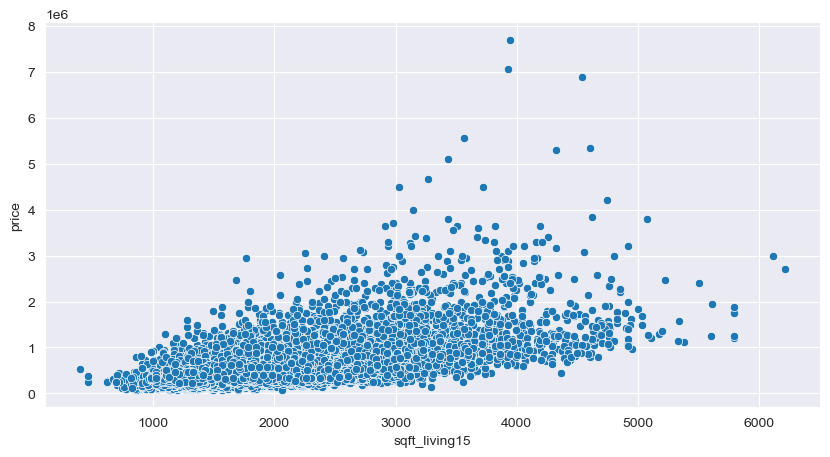

In [45]:
plt.figure(figsize=(10,5))
ax=sns.scatterplot(data=kc,y=kc["price"],x=kc["sqft_living15"])
plt.show()


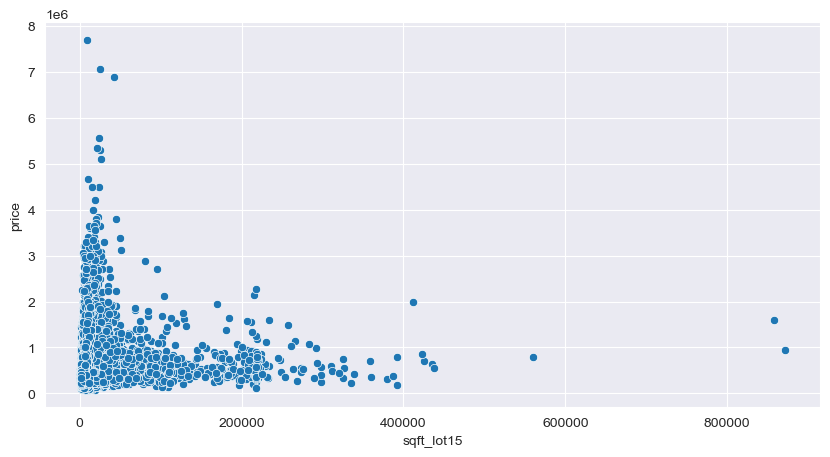

In [46]:
plt.figure(figsize=(10,5))
ax=sns.scatterplot(data=kc,y=kc["price"],x=kc["sqft_lot15"])
plt.show()


From the above 4 chart we know sqft_living15 has the same situation as sqft_living, and sqft_lot15 has the same situation as sqft_lot.

After finishing data explorator anaylsis, we found that location matters for price and variables that have impact on price include grades,bathrooms, bedrooms, sqft_living, sqft_basement,floors,view, waterfront, sqft_living15.

# 6. Model development

Before we start to build a regression model,let's check our analysis by the correlation between each variable and decide which variables we should use to build the model. We know more variables will help us build a more accurate model to a certain extent, but sometime too many is not a good thing because it might cause overfitting and worse results. When adding a new variable can not improve the model a lot, not adding would be a better choice. We alos konw that liner regression has an assumption that the input variables are independent from one another. If there are two variables with high correlations, it would be better to choose one of them as a variable. 

## 6.1 Pearson Correlation Matrix

In [47]:
kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,marker_color
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,blue
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,purple
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,blue
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,orange
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,purple


All variables about location such as  Zipcode ,Long and Lat are  excluded  in correlation coefficient analysis because it doesn't make sense.

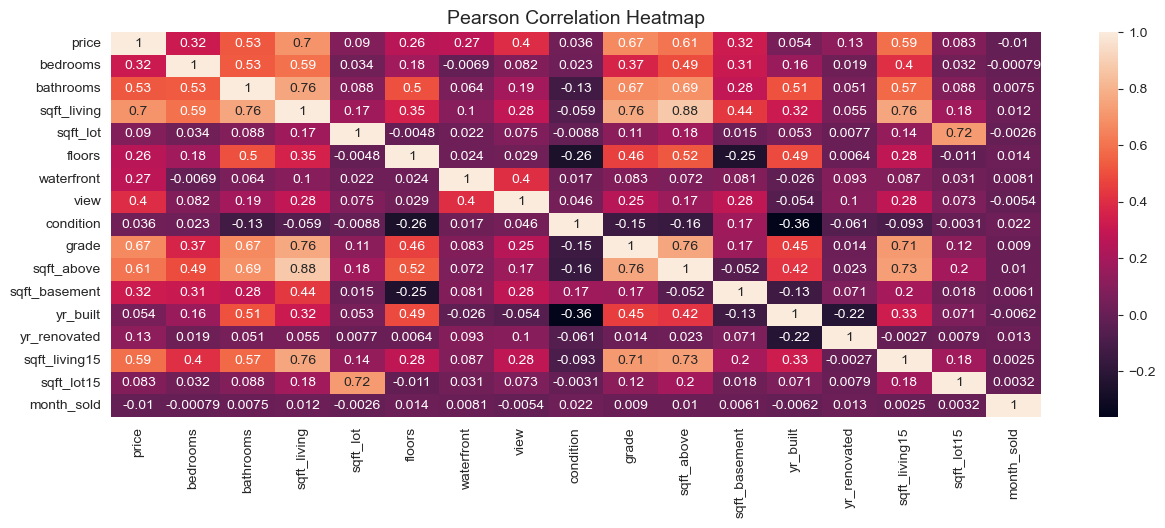

In [48]:
correlated_kc = kc.drop(["lat","long","zipcode"],axis=1).corr()
plt.figure(figsize=(15,5))
heatmap=sns.heatmap(correlated_kc,annot=True)
heatmap.set_title("Pearson Correlation Heatmap",fontdict={"fontsize":14})
plt.savefig("pearson.png")
plt.show()


kc["is_renovated"]=kc["is_renovated"].replace({True:0, False:0})

Create a Barplot of Correlation coefficient excluding sqft_above, because we find that varialbe sqt_above and sqt_living have a strong correlation that the coefficient is above 0.8, as we noted before  we should only keep one sqft_living that has a higher correlationg with price than sqft_above.

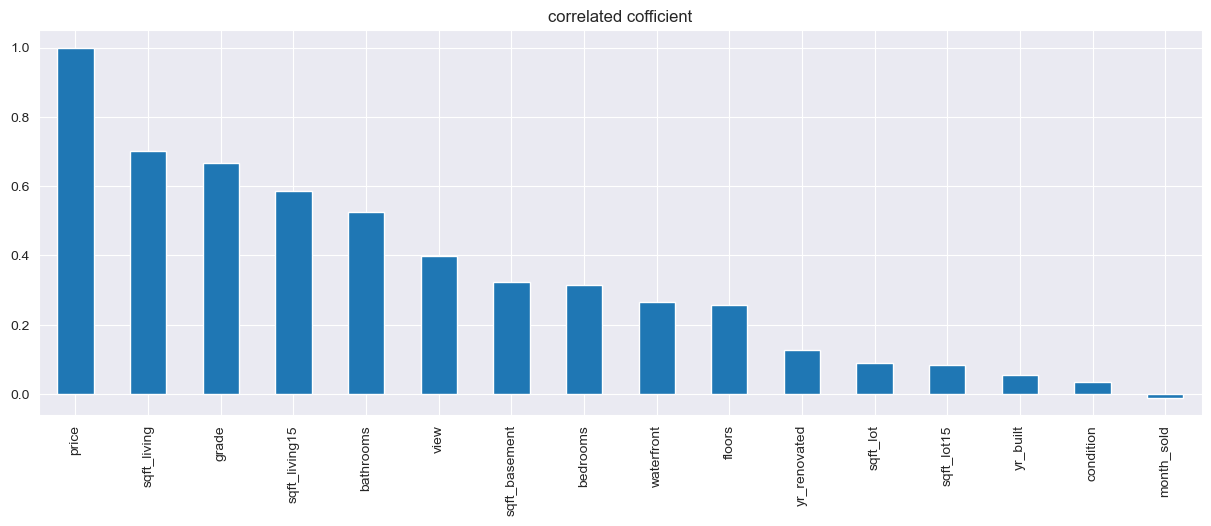

In [49]:
plt.figure(figsize=(15,5))
sorted_correlated_coefficient = correlated_kc.iloc[:,0].drop(["sqft_above"],axis=0).sort_values(ascending=False)
coefficient_bar=sorted_correlated_coefficient.plot(kind="bar",title="correlated cofficient")
plt.savefig("correlation_coefficient.png")
plt.show()

Based the definition that the attributes with correlation coefficient above 0.2 as related varialbes and Others as no_related variavles. From the heatmap and column chart we know variables such as sqft_lot, condition, yr_built, long, yr_renovated and sqft_lot15 are non_related, others are related. 

## 6.2 OLS Regression 1

Now, let's prepare the data for regression.

In [50]:
kc_reg1 = kc[["price","bedrooms","bathrooms","sqft_living","floors","waterfront","grade","view","sqft_basement","sqft_living15"]]
kc_reg1.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,grade,view,sqft_basement,sqft_living15
0,221900.0,3,1.00,1180,1.0,0,7,0,0,1340
1,538000.0,3,2.25,2570,2.0,0,7,0,400,1690
2,180000.0,2,1.00,770,1.0,0,6,0,0,2720
3,604000.0,4,3.00,1960,1.0,0,7,0,910,1360
4,510000.0,3,2.00,1680,1.0,0,8,0,0,1800


In [51]:
independent_variable_1 = kc_reg1.iloc[:,1:-1]
dependent_variable_1= kc_reg1.iloc[:,0]
independent_variable_1 = sm.add_constant(independent_variable_1)
regression_model_1 = sm.OLS(dependent_variable_1,independent_variable_1).fit()
print(regression_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     3993.
Date:                Wed, 29 Mar 2023   Prob (F-statistic):               0.00
Time:                        15:19:57   Log-Likelihood:            -2.9756e+05
No. Observations:               21596   AIC:                         5.951e+05
Df Residuals:                   21587   BIC:                         5.952e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.892e+05   1.45e+04    -33.633

## 6.3 OLS Regression 2 (Adding Zipcode)


As we analyzed before, Zipcode have an impact on the house price. Let's add zipcode into the model

In [52]:
zipcode_dummy = pd.get_dummies(kc["zipcode"])
zipcode_dummy 

,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21609,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
21610,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21611,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
kc_reg2=pd.concat([kc_reg1,zipcode_dummy],axis=1)
kc_reg2.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,grade,view,sqft_basement,sqft_living15,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,221900.0,3,1.00,1180,1.0,0,7,0,0,1340,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,3,2.25,2570,2.0,0,7,0,400,1690,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,2,1.00,770,1.0,0,6,0,0,2720,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,1.0,0,7,0,910,1360,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,3,2.00,1680,1.0,0,8,0,0,1800,...,0,0,0,0,0,0,0,0,0,0


In [54]:
independent_variable_2 = kc_reg2.iloc[:,1:-1]
dependent_variable_2= kc_reg2.iloc[:,0]
independent_variable_2 = sm.add_constant(independent_variable_2)
regression_model_2 = sm.OLS(dependent_variable_2,independent_variable_2).fit()
print(regression_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     1128.
Date:                Wed, 29 Mar 2023   Prob (F-statistic):               0.00
Time:                        15:20:43   Log-Likelihood:            -2.8979e+05
No. Observations:               21596   AIC:                         5.797e+05
Df Residuals:                   21517   BIC:                         5.804e+05
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.796e+04   1.47e+04      4.638


## 6.4 OLS Regression 3 (Using log(price))

As we know that the distribution of the house price is a little right skewed. It maybe a good choice to use log(price) to 
do the regression. Let's apply log to the price and then do the regression.

In [55]:
kc_reg3=kc_reg2.copy(deep=False)
kc_reg2

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,grade,view,sqft_basement,sqft_living15,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,221900.0,3,1.00,1180,1.0,0,7,0,0,1340,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,3,2.25,2570,2.0,0,7,0,400,1690,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,2,1.00,770,1.0,0,6,0,0,2720,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,1.0,0,7,0,910,1360,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,3,2.00,1680,1.0,0,8,0,0,1800,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,3.0,0,8,0,0,1530,...,0,0,0,0,0,0,0,0,0,0
21609,400000.0,4,2.50,2310,2.0,0,8,0,0,1830,...,1,0,0,0,0,0,0,0,0,0
21610,402101.0,2,0.75,1020,2.0,0,7,0,0,1020,...,0,0,0,0,0,0,0,0,0,0
21611,400000.0,3,2.50,1600,2.0,0,8,0,0,1410,...,0,0,0,0,0,0,0,0,0,0


In [56]:
kc_reg3["price"]=np.log(kc_reg3["price"])
kc_reg3


,price,bedrooms,bathrooms,sqft_living,floors,waterfront,grade,view,sqft_basement,sqft_living15,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,12.309982,3,1.00,1180,1.0,0,7,0,0,1340,...,0,0,0,0,0,0,1,0,0,0
1,13.195614,3,2.25,2570,2.0,0,7,0,400,1690,...,0,0,0,0,0,0,0,0,0,0
2,12.100712,2,1.00,770,1.0,0,6,0,0,2720,...,0,0,0,0,0,0,0,0,0,0
3,13.311329,4,3.00,1960,1.0,0,7,0,910,1360,...,0,0,0,0,0,0,0,0,0,0
4,13.142166,3,2.00,1680,1.0,0,8,0,0,1800,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,12.793859,3,2.50,1530,3.0,0,8,0,0,1530,...,0,0,0,0,0,0,0,0,0,0
21609,12.899220,4,2.50,2310,2.0,0,8,0,0,1830,...,1,0,0,0,0,0,0,0,0,0
21610,12.904459,2,0.75,1020,2.0,0,7,0,0,1020,...,0,0,0,0,0,0,0,0,0,0
21611,12.899220,3,2.50,1600,2.0,0,8,0,0,1410,...,0,0,0,0,0,0,0,0,0,0


In [57]:
independent_variable_3 = kc_reg3.iloc[:,1:-1]
dependent_variable_3= kc_reg3 .iloc[:,0]
independent_variable_3 = sm.add_constant(independent_variable_3)
regression_model_3 = sm.OLS(dependent_variable_3,independent_variable_3).fit()
print(regression_model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     1829.
Date:                Wed, 29 Mar 2023   Prob (F-statistic):               0.00
Time:                        15:20:56   Log-Likelihood:                 5156.9
No. Observations:               21596   AIC:                        -1.016e+04
Df Residuals:                   21517   BIC:                            -9525.
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.1837      0.017    709.985

## 6.5 Validate the prediction

## Model 1

In [58]:
kc_reg1["prediction"]= regression_model_1.predict(independent_variable_1)

C:\Users\Administrator\AppData\Local\Temp\2\ipykernel_11588\3198948436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kc_reg1["prediction"]= regression_model_1.predict(independent_variable_1)


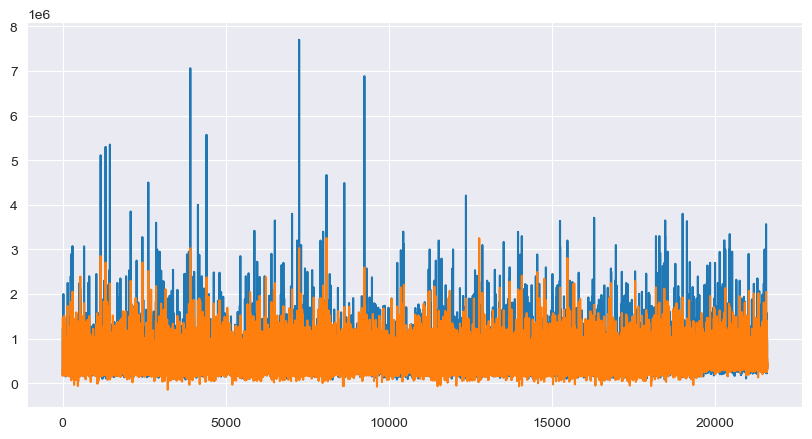

In [59]:
plt.figure(figsize=(10,5))
price_line1 = kc_reg1["price"].plot.line()
pred_price_line1=kc_reg1["prediction"].plot.line()
plt.show()

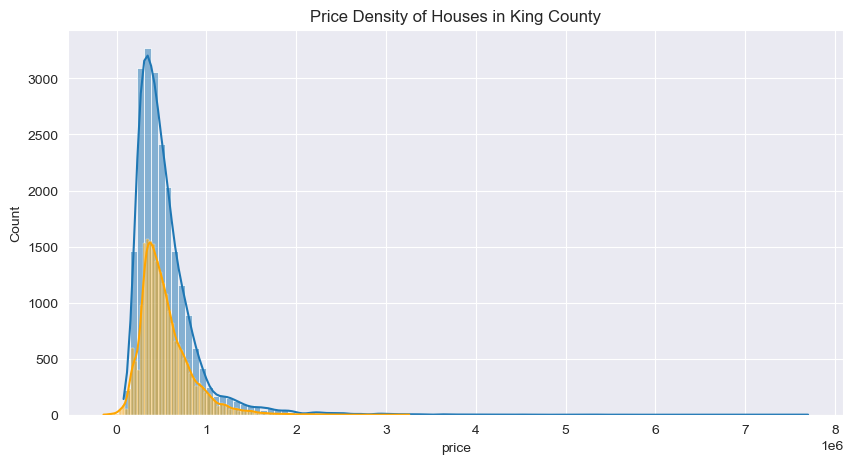

In [60]:
plt.figure(figsize=(10,5))
price_hist1 = sns.histplot(kc_reg1["price"],kde=True,bins=100)
pre_log_price_hist1 = sns.histplot(kc_reg1["prediction"],kde=True,bins=100,color="orange")
price_hist1.set(xlabel="price", title="Price Density of Houses in King County")
plt.show()

## Model 2

In [61]:
kc_reg2["prediction"]= regression_model_2.predict(independent_variable_2)

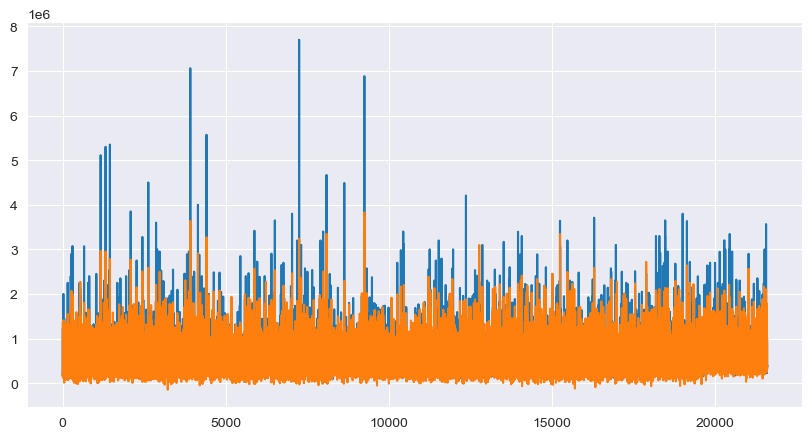

In [62]:
plt.figure(figsize=(10,5))
price_line2 = kc_reg2["price"].plot.line()
pred_price_line2=kc_reg2["prediction"].plot.line()
plt.show()

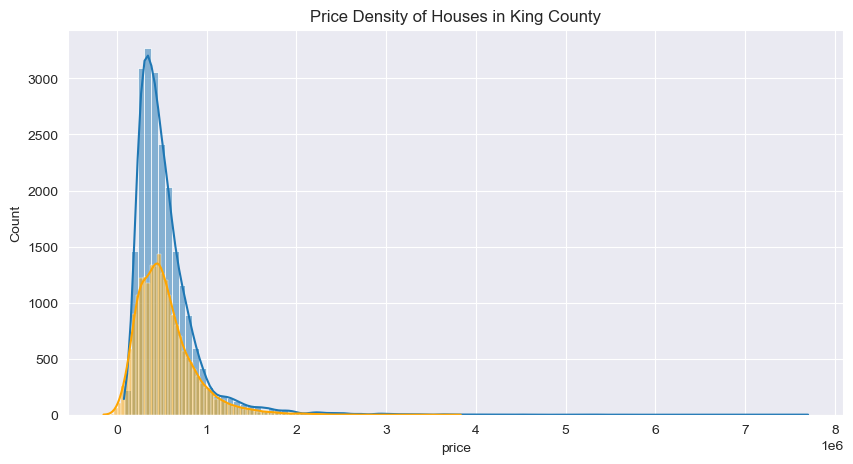

In [63]:
plt.figure(figsize=(10,5))
price_hist2 = sns.histplot(kc_reg2["price"],kde=True,bins=100)
pre_price_hist2 = sns.histplot(kc_reg2["prediction"],kde=True,bins=100,color="orange")
price_hist2.set(xlabel="price", title="Price Density of Houses in King County")
plt.show()

## Model 3

In [64]:
kc_reg3["prediction"]= regression_model_3.predict(independent_variable_3)

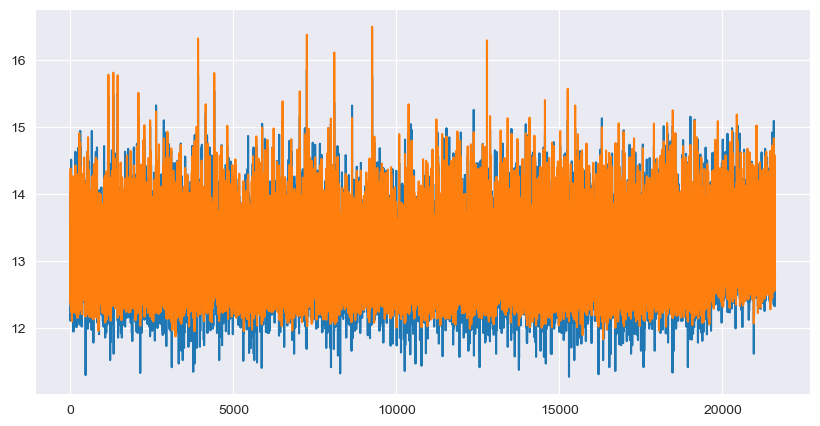

In [65]:
plt.figure(figsize=(10,5))
log_price_hist = kc_reg3["price"].plot.line()
pred_price_hist =kc_reg3["prediction"].plot.line()
plt.show()

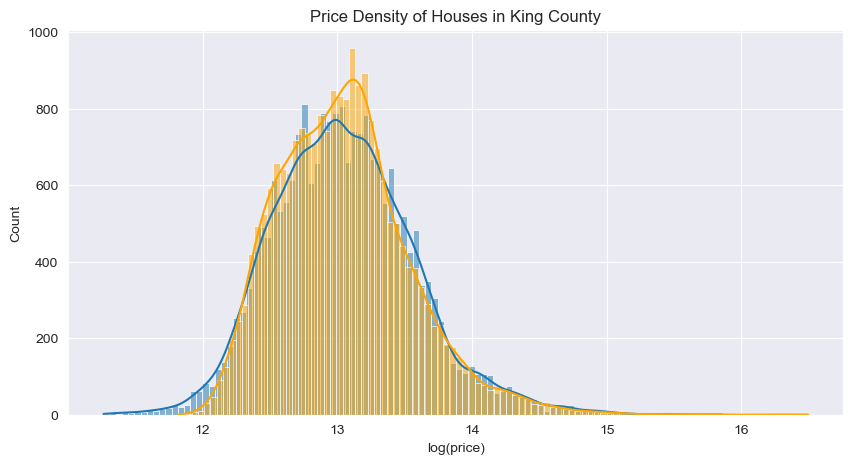

In [66]:
plt.figure(figsize=(10,5))
log_price_hist3 = sns.histplot(kc_reg3["price"],kde=True,bins=100)
pre_log_price_hist3 = sns.histplot(kc_reg3["prediction"],kde=True,bins=100,color="orange")
log_price_hist3.set(xlabel="log(price)", title="Price Density of Houses in King County")
plt.show()

The R squre of model 3 is 0.859 which is higher than model 1 and model 2. The log(price) and the prediction of the log(price) have very similar distribution.

# 7. Insights

Buying and selling house is a very important thing  for a family. When we decide to buy a house, we are always looking for a lower price for a better house. When we decide to sell a house, we always want to get a higher prcie. No matter we buy or sell a house it is very helpful to have an realatively accurate assesment on the house price. It can help us maxmize our benefit during the procsee.Based on our analysis above, we find some useful insight and also build a model to predict the house price reducing the subjectivity on price prediction.
   1. Location matters. The houses near Seattle or Bellevue have a higher average price than others.
   2. Grade is a great indicator for price and condition is not. High grade means high price.
   3. Size of the house matters. Sqft_living plays a very important role in price, and sqft_basement also has some impacts   
      on price.
   4. Number of bedrooms and bathrooms also show a upward trend in price. More rooms, higher price.
   5. Floor has a relatively lower relation with price.
   6. The year_built and year_renovated don't have as much impact in price as we expected.
   7. Houses with higher view value have high average price. But there is very small impact in price because almost all of         the view value are recorded 0. 
   8. Houses with waterfront have higher price.
   9. Sqft_living15 have impacts on price which is a little less than sqft_living.
   
Using all the related variables we build 3 modls. Model 3 which include variable zipcode and apply log to house price bring a good result with 0.869 R squre.
